In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import plotly
import plotly.express as px

In [ ]:
df = pd.read_csv('/Users/alexsazonov/Desktop/MFTI/Python/churn.csv')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# Предобработка данных
nan_verification = df['Exited'].isna().sum()
is_have_01_only = df['Exited'].unique()

print(f'Количество Nan - значений в поле Exited { nan_verification }')
print(f'Значения в поле Exited - { is_have_01_only }')

Количество Nan - значений в поле Exited 0
Значения в поле Exited - [1 0]


9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

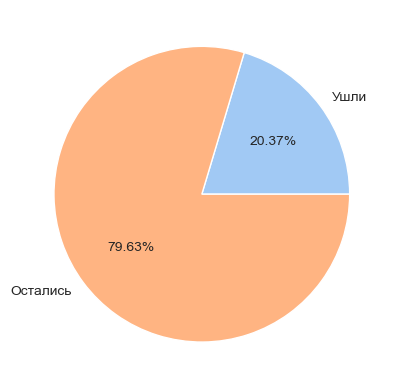

В датафрейме находятся в основном лояльные клиенты в соотношении 1:5


In [ ]:
total = df['Exited'].count()

exited = round((sum(df['Exited'] == 1) / total) * 100, 2)
non_exited = round((sum(df['Exited'] == 0) / total) * 100, 2)

colors = sns.color_palette('pastel')[0:5]
plt.pie([exited, non_exited], labels = ['Ушли','Остались'], colors = colors, autopct='%.2f%%')
plt.show()
print('В датафрейме находятся в основном лояльные клиенты в соотношении 1:5')

9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

Распределение баланса близко к нормальному, данные пригодны для дальнейшей работы


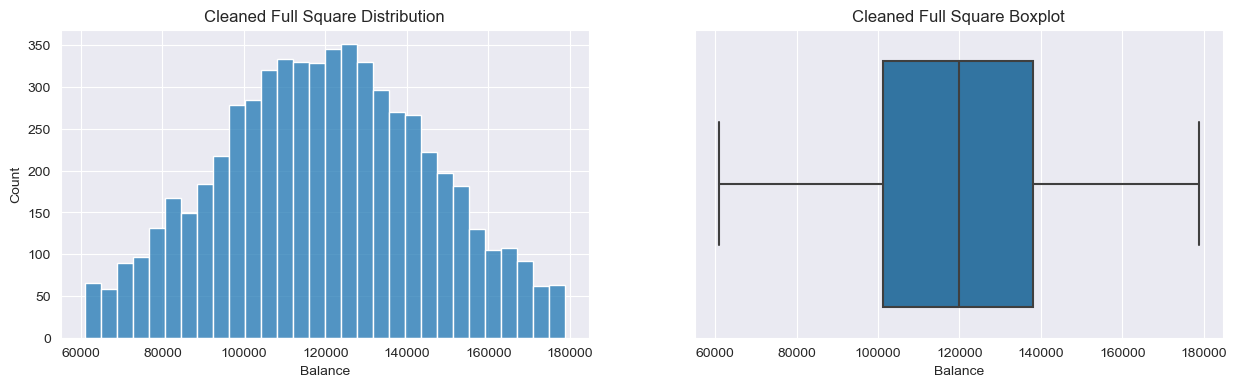

In [ ]:
def outliers_iqr_mod(data, feature, left=1.5, right=1.5):

    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x<lower_bound) | (x > upper_bound)]
    cleaned = data[(x>lower_bound) & (x < upper_bound)]
    return outliers, cleaned

balance_df = df[df['Balance'] > 2500]
outliers, cleaned = outliers_iqr_mod(balance_df, 'Balance', left=1, right=1)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=cleaned, x='Balance', ax=axes[0]);
histplot.set_title('Cleaned Full Square Distribution');
boxplot = sns.boxplot(data=cleaned, x='Balance', ax=axes[1]);
boxplot.set_title('Cleaned Full Square Boxplot');
print('Распределение баланса близко к нормальному, данные пригодны для дальнейшей работы. Основаная масса вкладов от 100 до 140кк.')

9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

Ушедшие клиенты имели меньшие накопления, чем действиующие, существенного ущерба банку не нанесено.


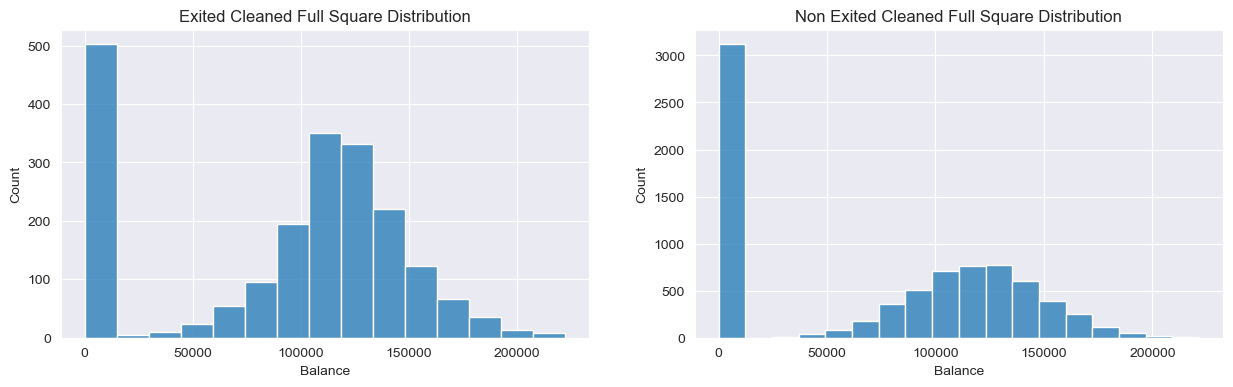

In [ ]:
exited_df = df[df['Exited'] == 1]
outliers, cleaned1 = outliers_iqr_mod(exited_df, 'Balance', left=1, right=1)

non_exited_df = df[df['Exited'] == 0]
outliers, cleaned2 = outliers_iqr_mod(non_exited_df, 'Balance', left=1, right=1)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=cleaned1, x='Balance',ax=axes[0]);
histplot.set_title('Exited Cleaned Full Square Distribution');

histplot = sns.histplot(data=cleaned2, x='Balance', ax=axes[1]);
histplot.set_title('Non Exited Cleaned Full Square Distribution');
print('Ушедшие клиенты имели меньшие накопления, чем действиующие, существенного ущерба банку не нанесено.')

9.4 Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

Потенциальных выбросов больше в группе оставшихся клиентов, особое внимание нужно уделить категории возраста выше 55 лет. Провести маркетинговые акции по удержанию людей предпенсионного возраста, предлагать перевести вклады в НПФ


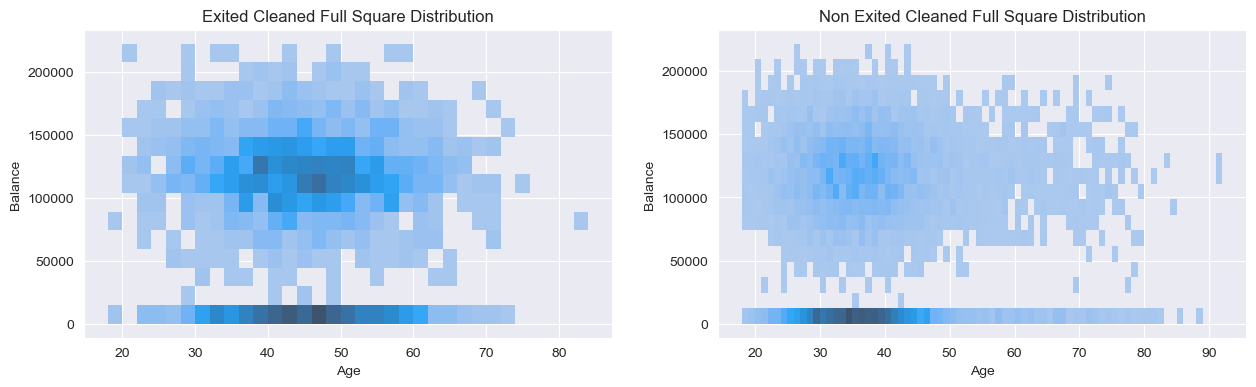

In [ ]:
exited_df = df[df['Exited'] == 1]
outliers, cleaned1 = outliers_iqr_mod(exited_df, 'Balance', left=1, right=1)

non_exited_df = df[df['Exited'] == 0]
outliers, cleaned2 = outliers_iqr_mod(non_exited_df, 'Balance', left=1, right=1)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=cleaned1, x='Age', y='Balance',ax=axes[0]);
histplot.set_title('Exited Cleaned Full Square Distribution');

histplot = sns.histplot(data=cleaned2, x='Age', y='Balance', ax=axes[1]);
histplot.set_title('Non Exited Cleaned Full Square Distribution');

print('Потенциальных выбросов больше в группе оставшихся клиентов, особое внимание нужно уделить категории возраста выше 55 лет. Провести маркетинговые акции по удержанию людей предпенсионного возраста, предлагать перевести вклады в НПФ')

9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

Взаимосвязи нет, требуется доп исследование.


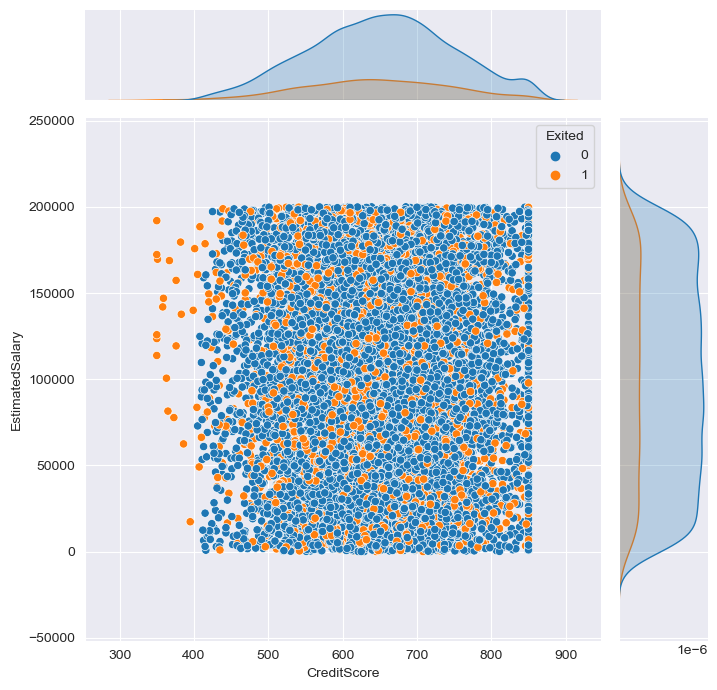

In [ ]:
sns.jointplot(x='CreditScore', y='EstimatedSalary', hue='Exited', data=df, height=7)
print('Взаимосвязи нет, требуется доп исследование.')

9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

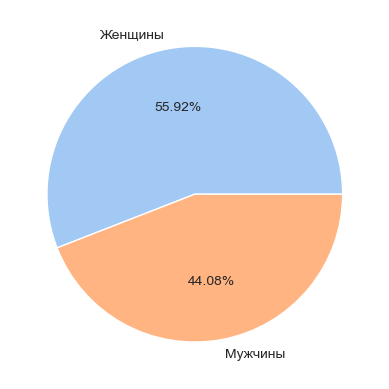

In [ ]:
df['Gender'] = df['Gender'].replace({'Female':0,'Male':1})
# Female = 0
# Male = 1
exited_df = df[df['Exited'] == 1]

female_exited = exited_df.query('Gender == 0')
female = female_exited['Gender'].count()

male_exited = exited_df.query('Gender == 1')
male = male_exited['Gender'].sum()


colors = sns.color_palette('pastel')[0:5]
plt.pie([female, male], labels = ['Женщины','Мужчины'], colors = colors, autopct='%.2f%%')
plt.show()

9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

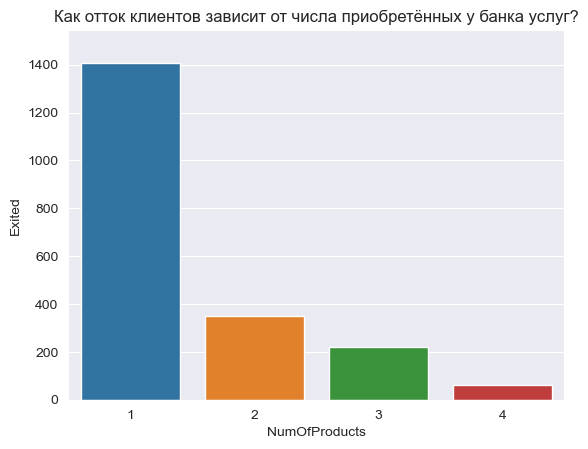

Отток клиентов имеет обратную зависимость от числа приобретённых у банка услуг


In [ ]:
sns.barplot(data=df, x='NumOfProducts', y='Exited', estimator=sum, errwidth=0)
plt.title('Как отток клиентов зависит от числа приобретённых у банка услуг?')
plt.show()
print('Отток клиентов имеет обратную зависимость от числа приобретённых у банка услуг')

9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

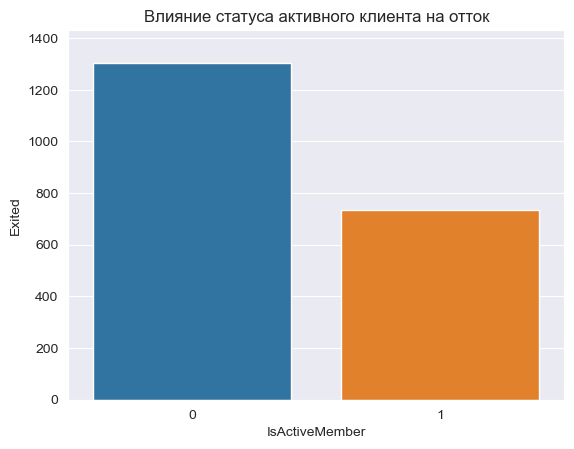

Активность клиента заставляет его оставаться клиентом банка, высокий процент оттока говорит об отсутсвии акций и маркетинговых предприятий для стимулиции активности клиентов.


In [ ]:
sns.barplot(data=df, x='IsActiveMember', y='Exited', estimator=sum, errwidth=0)
plt.title('Влияние статуса активного клиента на отток')
plt.show()
print('Активность клиента заставляет его оставаться клиентом банка, высокий процент оттока говорит об отсутсвии акций и маркетинговых предприятий для стимулиции активности клиентов.')

9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [ ]:
# Geography
fig = px.choropleth(df, locations="Geography",
                    color="Exited", # lifeExp is a column of gapminder
                    hover_name="Geography", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.show()

9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

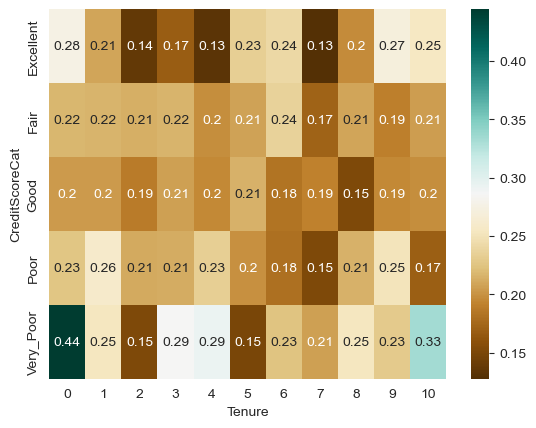

Чаще всего уходят категории poor и very_poor почти независимо от срока пользования услугами банка, на втором месте категория Excellent


In [ ]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

df['CreditScoreCat'] = df['CreditScore'].apply(get_credit_score_cat)

pivot = df.pivot_table(
    values='Exited',
    columns='Tenure',
    index='CreditScoreCat',
)
sns.heatmap(data=pivot, annot=True, cmap='BrBG')
plt.show()
print('Чаще всего уходят категории poor и very_poor почти независимо от срока пользования услугами банка, на втором месте категория Excellent')
